# Tarea 3

## Julio César Cons Calderón

## Desarrollo Computacional II


## Actividad 1

Considere una simulacion de Monte Carlo para un sistema bidimensional con un modelo
de potencial de disco duro.
Implementar el código presentado en clase (o su analogo) para construir una
configuración inicial aleatoria bidimensional sin traslapes con margen en frontera.
Ejecutar su programa para obtener configuraciones iniciales para los casos siguientes:
- Concentración reducida fija en n* = 0.4 y N = 100, 500 y 1000 partículas.
- Número de partículas fijo en N=500 y n* = 0.2, 0.6 y 0.8.

En cada caso:

1. Incluir en su código la instrucción que lleve a mostrar la longitud de la celda de
simulación.
2. Mostrar gráficamente la distribución de partículas (en la configuracion final) obtenida
donde se aprecie con claridad la longitud de la celda correspondiente.

Importamos la librerias necesarias para nuestro proyecto

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.spatial import distance
import os
import time 


Creamos la clase Arreglo 2D aleatorio con margenes. Esta clase nos creara una configuración inicial aleatoria con margenes de n* densidad y de N particulas. Esta clase tiene varios métodos o funciones que definiran al objeto que estamos programando.

- Init: El método init es la funcion que se correra automaticamente cuando iniciames la clase. Consta de pedirnos los parametros n* y N.


- L: Nos calcula la longitud de la celda con la formula: $$ L = \sqrt{ \dfrac{N}{n^*} } $$


- r: Nos calcula el radio de las particulas con la formula:  $$ r = \sqrt{ \dfrac{n^*}{2}} $$


- new_point: Nos genera un nuevo punto que este dentro de los margenes de la celda. Para eso se tiene que generar un numero tomando en cuanto el largo de la longitud y multiplicarla por $1- \dfrac{2r}{l}$ ya que esta generara un punto que no sobrepasara los extremos de la caja.


- array: Este es el metodo que generara las N particulas aleatorias en la caja sin traslapes. Primero genero un punto nuevo y lo guardo en una lista. Se crea un ciclo que vaya hasta las N particulas, se genera un nuevo punto con la función new_point y se guarda en la lista creada anteriormente. Despues se crea otro ciclo que vaya hasta donde termine el contador de la función anterior, esto servira para comparar la distancia de la particula nueva con las generadas anteriormente. Si la distancia es mayor al diametro $2r$ de las particulas entonces que no haga nada pero si es menor, que elimine el ultimo punto de la lista y le reste al contador del ciclo. Por ultimo que me devuelva la lista generada.   


- graph: Esta función nos permitira gráficar las N particulas. En esta función solo se guardaran las graficas.


- graph_show: Esta función tambien nos permite gráficar las N particulas. Pero aquí si se mostraran en la terminal.

In [2]:
class arreglo2D_aleatorio_cm:
    def __init__(self,n,N):
        self.n=n
        self.N=N
        self.data=self.array()
        self.large = self.L()

    def L(self):
        return (self.N/self.n)**(1/2)

    def r(self):
        return float(np.sqrt(self.n)/2)
    
    def new_point(self):
        x=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
        y=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
        return (x,y)

    def array(self):
        
        Dat=[self.new_point()]
        
        i=0
        while len(Dat)<self.N:
            i = i+1
            x=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
            y=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
            Par=(x,y)
            Dat.append(Par)
            for j in range(1,i+1):
                distancia=distance.euclidean(Par,Dat[i-j])
                if distancia < 2*self.r():
                    Dat.pop()
                    i=i-1
                    break
        return Dat

    def graph(self,data,title,size,c,contador,trazadora):
        color_pre=c
        plt.ioff()
        fig, ax = plt.subplots(figsize=(size,size))
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            if i == trazadora:
                c="r"
            else:    
                c=color_pre
            circle1 = plt.Circle(data[i], self.r(), color=c)
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title(title, fontsize=16)
        plt.savefig("./image/" + str(contador) + ".png")
        plt.close(fig)
        
    def graph_show(self,data,title):
        plt.ion()
        fig, ax = plt.subplots(figsize=(5,5))
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            circle1 = plt.Circle(data[i], self.r(), color="r")
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title(title, fontsize=16)
        plt.show
    
   



Esta clase Arreglo 2D aleatorio sin margenes hereda todos los metodos de la clase anterior (arreglo2D_aleatorio_cm), su unica excepción con la anterior es que en el metodo array los puntos se generan sin margenes, lo que resulta en que las particulas en la configuración inicial puedan estar en una parte afuera de los margenes de la celda.

In [3]:
class arreglo2D_aleatorio_sm(arreglo2D_aleatorio_cm):
    def array(self):
         
        Dat=[( self.L()*(random.random() - 1/2) , self.L()*(random.random() - 1/2))]
        i=0
        while len(Dat)<self.N:
            i = i+1
            x=self.L()*(random.random() - 1/2)
            y=self.L()*(random.random() - 1/2)
            Par=(x,y)
            Dat.append(Par)
            for j in range(1,i+1):
                distancia=distance.euclidean(Par,Dat[i-j])
                if distancia < 2 * self.r():
                    Dat.pop()
                    i=i-1
                    break
        return Dat


Este arreglo tambien hereda todos los metodos de las clases anteriores, solamente que en esta clase el metodo array se cambia para generar una configuración inicial cuadrada donde los puntos estan equidistantes uno del otro. 

In [4]:
class arreglo2D_cuadrado(arreglo2D_aleatorio_cm):
    def array(self):
        i=0
        x=[]
        Nfinal = int(round(np.sqrt(self.N),0))
        for i in range(Nfinal):
            x.append(-self.L()/2+2*self.r()/2  +i*self.L()/(Nfinal))
        p=set([(i, j) for i in x for j in x])
        dat = list(p)
        return dat

Aquí generamos una nueva clase Montecarlo 2D. Esta se encargara de mover las particulas aleatoriamente y de que no se traslapen. Hereda tambien algunos metodos de arreglo2D_aleatorio_cm, y algunos que agrega el son:

- mod_pot: Esta es la función de potencial para esferas duras. 


- sumaup: Es la suma de energía potencial de toda una configuración.


- UP: es la comparación de de energía potencial de la particula iesima con todas las otras partículas de su configuración. 


- algoritmo: En este metodo se crea el algoritmo de montecarlo para mover a las particulas de una configuración a otra. Para eso, leemos otros dos nuevos parametro. NSTEP que nos dice cuantas configuraciones habra y RMAX que nos dice cuantas unidades de su radio se pueden mover.


- Trazadora: Nos permite tener en una lista de los puntos en los cuales la particula trazadora estaba.


- graph_traz: Nos permite graficar la trayectoria que tomen las particula que escogemos. 


- animación: Nos permite crear una animación con todas las configuraciónes de las particulas. 


- Display_gif: Nos permite mostrar la animación que creamos anteriormente. 








In [5]:

class montecarlo2D(arreglo2D_aleatorio_cm):

    def mod_pot(self, distancia):
        if distancia < self.large/2 and distancia < 2*self.r():
            V =  1e10
        else:
            V = 0
        return V

    def sumaup(self,data):
        V = 0
        i=1
        m=0
        while i<len(data):
            for j in range(0,i):
                ri=np.array(data[i])
                rj=np.array(data[j])
                ri = ri - self.large*np.round(ri/self.large)
                rj = rj - self.large*np.round(rj/self.large)
                rij= ri - rj  
                distancia=np.linalg.norm(rij)
                Vij = self.mod_pot(distancia)
                V = V + Vij
            i = i+1           
        return V

    def UP(self,i,ri,data):
        V = 0

        for j in range(0,len(data)):
            if i != j:
                ri = ri - self.large*np.round(ri/self.large)
                rj=np.array(data[j])
                rj = rj - self.large*(np.round(rj/self.large))
                rij= ri - rj  
                distancia=np.linalg.norm(rij)
                Vij = self.mod_pot(distancia)                
                V = V + Vij
        return V

    def algoritmo(self,NSTEP,R_MAX):        
        i=0
        k=0
        data_new = np.array([self.data])
        p=[]
        ti = time.time()
        while k<NSTEP:
            array1 = []
            i=0
            m=0
            while i < len(self.data):
                ri_old=data_new[k][i]
                Ui_old = self.UP(i,ri_old,data_new[k])
                ri_random = np.array((random.random()-0.5,random.random()-0.5))
                ri_new = ri_old + R_MAX*ri_random
                ri_new = ri_new + self.large*(-np.round(ri_new/self.large))
                array1.append(list(ri_new))
                Ui_new_1 = self.UP(i,ri_new,array1)
                Ui_new_2 = self.UP(i,ri_new,data_new[k])                
                delta_u = Ui_new_1 + Ui_new_2  - Ui_old
                if delta_u < 75 or delta_u <= 0:
                    pass
                elif np.exp(-delta_u) > random.random():
                    pass
                else:
                    m=m+1
                    i = i - 1
                    array1.pop(-1)
                i += 1
            data_new = np.append(data_new,[array1],axis=0) 
            k += 1
            if k%5 == 0:
                print("Se han traslapdo ",m, " veces en la configuracion",k)
        tf = time.time()
        print("Se ha tardado", round(tf - ti,5), "segundos")
        
        return data_new

    def trazadora(self,data,rand):
        k=0
        i=0
        NSTEP=len(data)
        N=len(data[1])
        Path_traz=[]

        for k in range(NSTEP):
            for i in range(N):
                if i==rand:
                    Path_traz.append(data[k][i])

        return Path_traz

    def graph_traz(self,data):
        fig, ax = plt.subplots(figsize=(10,10))
        plt.ioff()
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            c=((1,i/len(data),np.exp(-0.8*i/(len(data))),1))
            circle1 = plt.Circle(data[i], self.r()/10, color=c)
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title("Trayectoria partícula trazadora", fontsize=16)
        plt.show()
        plt.close(fig)
        
    def animacion(self,data):
        
        for r in  range(len(data)):
            self.graph(data[r],str(r)+".png",10,"b",r,N_trazadora) 
        
        import glob
        from PIL import Image
        import os

        fp_in = "./image/*.png"
        fp_out =  "simulacion_N="+str(self.N)+"_n="+str(self.n)+"_NSTEP="+str(NSTEP)+"_DMAX="+str(DMAX)+".gif"

        img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=os.path.getmtime)]
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                 save_all=True, duration=1000/24, loop=0)
        
        return fp_out
    
    def display_gif(self,fn):
        from IPython import display
        return display.HTML('<img src="{}">'.format(fn))
            

        



Se dan el valor de los parametros n*, N , NSTEP y DMAX.

In [6]:
n=0.4
N=100
NSTEP=100
DMAX=0.2


Se llama a la clase montecarlo2D con entradas n y N. y se gráfica la configuración inical

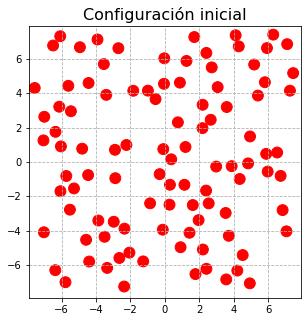

In [7]:
montecarlo = montecarlo2D(n,N)
montecarlo.graph_show(montecarlo.data,"Configuración inicial")


Con la clase montecarlo se ejecuta el algoritmo para mover las particulas. Todas las configuraciones se guardan en una array de 3 indices. el primer indice dice cual configuración es, el segundo que partícula de esa configuración y el tercero es la componente x y y de la partícula. Este algoritmo tambien nos mostrar un contador para ver en cuantas particulas se traslaparon en un numero de configuraciones dado y se mostrar cada 5 configuraciones. 

In [8]:
configuracion=montecarlo.algoritmo(NSTEP,DMAX)
configuracion_inicial=configuracion[0]
configuracion_final=configuracion[-1]



Se han traslapdo  4  veces en la configuracion 5
Se han traslapdo  6  veces en la configuracion 10
Se han traslapdo  4  veces en la configuracion 15
Se han traslapdo  8  veces en la configuracion 20
Se han traslapdo  8  veces en la configuracion 25
Se han traslapdo  4  veces en la configuracion 30
Se han traslapdo  3  veces en la configuracion 35
Se han traslapdo  2  veces en la configuracion 40
Se han traslapdo  8  veces en la configuracion 45
Se han traslapdo  3  veces en la configuracion 50
Se han traslapdo  11  veces en la configuracion 55
Se han traslapdo  17  veces en la configuracion 60
Se han traslapdo  3  veces en la configuracion 65
Se han traslapdo  1  veces en la configuracion 70
Se han traslapdo  3  veces en la configuracion 75
Se han traslapdo  5  veces en la configuracion 80
Se han traslapdo  1  veces en la configuracion 85
Se han traslapdo  17  veces en la configuracion 90
Se han traslapdo  6  veces en la configuracion 95
Se han traslapdo  6  veces en la configuracion 1

Se calcula y muestra la energía potencial para la ultima configuración

In [9]:
Potencial_final=montecarlo.sumaup(configuracion_final)

print("La energía potencial de la ultima configuración es: " + str(Potencial_final))

La energía potencial de la ultima configuración es: 0


Se escoje aleatoriamente la particula trazadora.

In [10]:
N_trazadora=random.randint(0,montecarlo.N-1)
N_trazadora

25

Usamos el metodo trazadora para obtener la trayectoria de la partícula trazadora. 

In [11]:
Path_traz=montecarlo.trazadora(configuracion,N_trazadora)

Graficamos el camino de la particula trazadora, en color tranaja

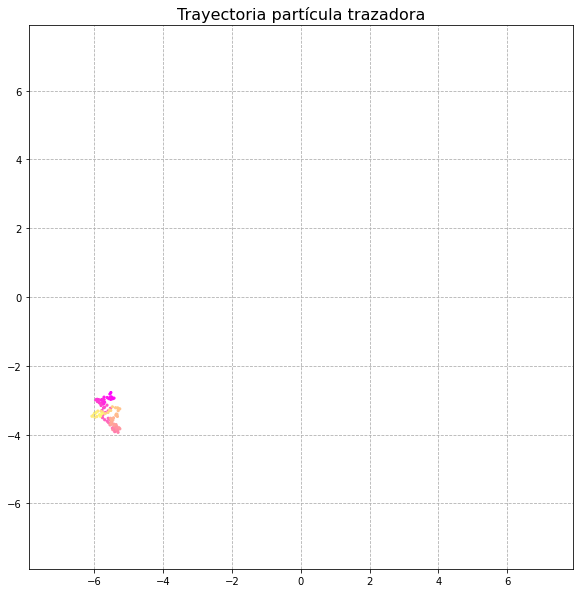

In [12]:
montecarlo.graph_traz(Path_traz)

Generamos la animación.

In [13]:
fn = montecarlo.animacion(configuracion)
fn

'simulacion_N=100_n=0.4_NSTEP=100_DMAX=0.2.gif'

Mostramos la animacion configuración

In [14]:
montecarlo.display_gif('simulacion_N=100_n=0.4_NSTEP=100_DMAX=0.2.gif')

Borramos todas las imagenes que formaron la animación

In [15]:
os.popen('rm ./image/*.png').read()

''

Hasta aqui terminamos la actividad 1. Lo que toca hacer es evaluar cada uno en diferentes parametros. Listamos todas las imagenes y las evaluamos

In [16]:
ejemplo_dir = './'
contenido = os.listdir(ejemplo_dir)
gif = []
for fichero in contenido:
    if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith('.gif'):
        gif.append(fichero)
gif

['simulacion_N=1000_n=0.4_NSTEP=100_DMAX=0.2.gif',
 'simulacion_N=100_n=0.6_NSTEP=100_DMAX=0.2.gif',
 'simulacion_N=500_n=0.4_NSTEP=100_DMAX=0.2.gif',
 'simulacion_N=100_n=0.8_NSTEP=100_DMAX=0.2.gif',
 'simulacion_N=100_n=0.4_NSTEP=100_DMAX=0.2.gif']

In [17]:
from IPython import display
string=""
for i in  gif:
    string=string +"<center><h3>" + str(i) + "</h3>"  + "<img src=" + str(i) + "> </center>"

display.HTML(string)



## Actividad 2. 

Empaquetamiento de esferas duras.

Para un sistema de esferas duras del mismo diámetro (monodisperso, de una sola
especie), investigar sobre el valor de la máxima fracción en volumen (close packing).
Si encuentra los valores de empaquetamiento aleatorio (random close packing) incluya sus
valores también.

Creamos una clase que contenga el arreglo cuadrado y todos los metodos de montecarlo. 

In [18]:
class montecarlo2D_a_c3(arreglo2D_cuadrado,montecarlo2D):
    pass

Llamamos a la clase pasada con los parametros n=1 y 25 particulas.

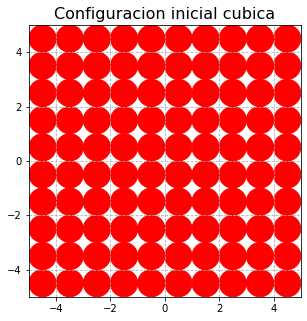

In [19]:
montecarlo_cubico = montecarlo2D_a_c3(1,100)
montecarlo_cubico.graph_show(montecarlo_cubico.data,"Configuracion inicial cubica")

Podemos ver que no cabe otra particula en esta configuración. Por lo que en una configuración cuadrada el maximo parametro de densidad es 1.


Creamos la clase montecarlo2D aleatorio sin margenes

In [20]:
class montecarlo2D_a_sm(arreglo2D_aleatorio_sm,montecarlo2D):
    pass

Despues de varias pruebas llegamos que el maximo parametro de densidad para el arreglo sin margeneses 0.86

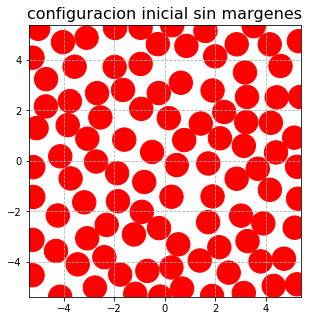

In [21]:
montecarlo_sm = montecarlo2D_a_sm(0.86,100)
montecarlo_sm.graph_show(montecarlo_sm.data,"configuracion inicial sin margenes")


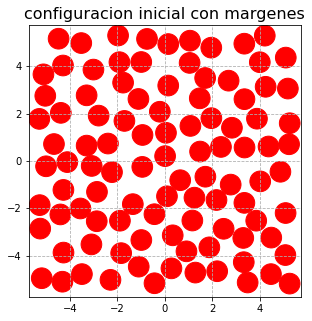

In [22]:
montecarlo_cm = montecarlo2D(0.76,100)
montecarlo_cm.graph_show(montecarlo_cm.data,"configuracion inicial con margenes")



## Actividad 3.


Modifique el código MC elaborado para esferas duras, para el caso de un potencial de
interacción par u(r) de pozo cuadrado (square well), descrito como:



$$V(r)=$$
            \begin{array}{lcc}
             \infty &   si  & r \leq \sigma \\
             \\ -\epsilon &  si & \sigma < r < \lambda \\
             \\ 0 &  si  & r \geq \lambda
             \end{array}
   
donde: s es el diámetro de las partículas, l y e el alcance y la profundidad del pozo
cuadrado respectivamente. Explore tomando como parámetros (adimensionalizados) fijos
λ∗ = 1.25 y T∗ = 1.0, así mismo, considere una concentración reducida de n* = 0.4.

i)Muestre una grafica de la configuracion inicial y otra de la configuracion final

ii)Muestre una grafica de la variacion de la energía potencial total en las
diferentes configuraciones que cubre la simulación.

iii)Muestre una grafica que ilustre todas las posiciones que ocupa una particula
trazadora a lo largo de la simulación.


Creamos una nueva clase que contenga que contenga la nueva función del potencial. Metemos esa función en la nueva clase montecarlo Nuevo Potencial 2

In [23]:
class potencial:
    def mod_pot(self,distancia):
        V=0
        if distancia < 2*self.r():
            V = 1e10
        elif  2*self.r() < distancia< 1.25:
            V = -1*10**5
        return V
   
    def animacion(self,data):
        
        for r in  range(len(data)):
            self.graph(data[r],str(r)+".png",10,"b",r,N_trazadora) 
        
        import glob
        from PIL import Image
        import os

        fp_in = "./image/*.png"
        fp_out =  "simulacion_Pot_2_N="+str(self.N)+"_n="+str(self.n)+"_NSTEP="+str(NSTEP)+"_DMAX="+str(DMAX)+".gif"

        img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=os.path.getmtime)]
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                 save_all=True, duration=1000/24, loop=0)
        
        return fp_out

    
    
class montecarlo_NP_2(potencial, montecarlo2D):
    pass

Creamos la configuración inicial con $ n^*=0.4$ y $ N=100$

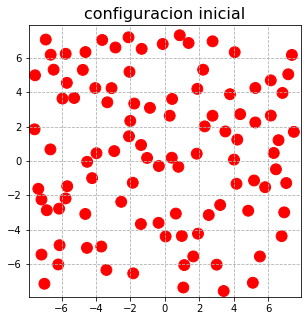

In [24]:
montecarlo_NP2 = montecarlo_NP_2(0.4,100)
montecarlo_NP2.graph_show(montecarlo_NP2.data,"configuracion inicial")


Ejecutamos el algoritmo de montecarlo con el nuevo potencial.

In [25]:
NSTEP=200
configuracion_NP2=montecarlo_NP2.algoritmo(NSTEP,DMAX)
configuracion_inicial_NP2=configuracion_NP2[0]
configuracion_final_NP2=configuracion_NP2[-1]


Se han traslapdo  19  veces en la configuracion 5
Se han traslapdo  27  veces en la configuracion 10
Se han traslapdo  32  veces en la configuracion 15
Se han traslapdo  10  veces en la configuracion 20
Se han traslapdo  7  veces en la configuracion 25
Se han traslapdo  29  veces en la configuracion 30
Se han traslapdo  6  veces en la configuracion 35
Se han traslapdo  10  veces en la configuracion 40
Se han traslapdo  17  veces en la configuracion 45
Se han traslapdo  1  veces en la configuracion 50
Se han traslapdo  11  veces en la configuracion 55
Se han traslapdo  20  veces en la configuracion 60
Se han traslapdo  10  veces en la configuracion 65
Se han traslapdo  8  veces en la configuracion 70
Se han traslapdo  6  veces en la configuracion 75
Se han traslapdo  8  veces en la configuracion 80
Se han traslapdo  5  veces en la configuracion 85
Se han traslapdo  15  veces en la configuracion 90
Se han traslapdo  9  veces en la configuracion 95
Se han traslapdo  5  veces en la configu

Mostramos la configuración inicial con el nuevo potencial.

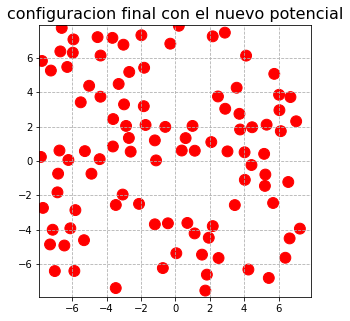

In [26]:
montecarlo_NP2.graph_show(configuracion_final_NP2,"configuracion final con el nuevo potencial")


Escogemos aleatoriamente la particula trazadora.

In [27]:
N_trazadora=random.randint(0,montecarlo_NP2.N-1)
N_trazadora

56

Metemos la posición de la partícula trazadora en todas las configuraciones.

In [28]:
Path_traz=montecarlo_NP2.trazadora(configuracion_NP2,N_trazadora)


Graficamos la posición de a partícula en las configuraciones.

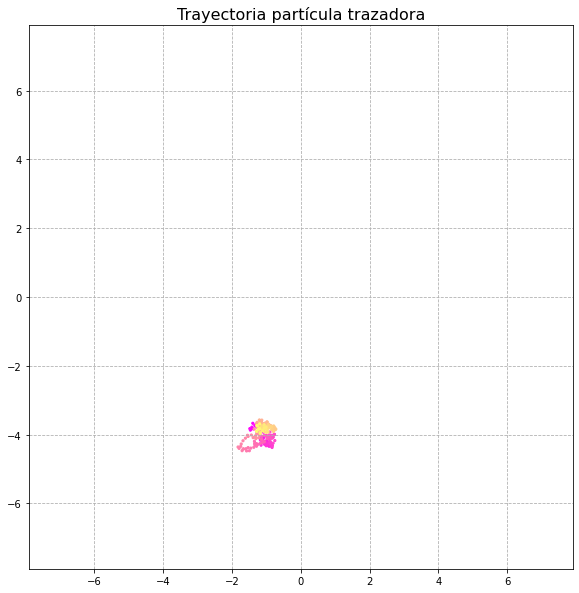

In [29]:
montecarlo_NP2.graph_traz(Path_traz)

Creamos la animacion de la configuración con el nuevo potencial

In [30]:
fn = montecarlo_NP2.animacion(configuracion_NP2)
fn

'simulacion_Pot_2_N=100_n=0.4_NSTEP=200_DMAX=0.2.gif'

Mostramos la animación

In [31]:
montecarlo_NP2.display_gif(fn)

Calculamos al energía potencial para cada configuración

In [32]:
V=list()
for i in range(len(configuracion)):
    V.append(montecarlo_NP2.sumaup(configuracion[i]))


Mostramos la energía potencial para cada configuración

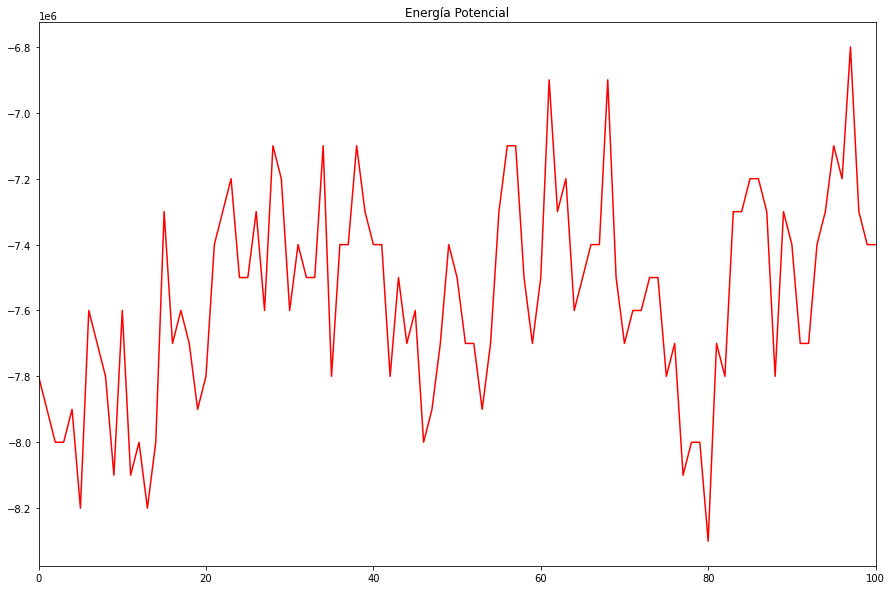

In [33]:
plt.figure(figsize=(15,10))
plt.xlim(0,100)
plt.plot(np.arange(0,len(V),1),V,"r")
plt.title("Energía Potencial")
plt.show()

In [34]:
os.popen('rm ./image/*.png').read()

''